In [ ]:
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import brown

In [ ]:
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
tagged_sentences = nltk.corpus.brown.tagged_sents(tagset='universal')

In [ ]:
print(tagged_sentences[0])

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]


In [ ]:
brown_data_sentences = []
brown_data_tags = []
for data in tagged_sentences:
  sentences = []
  tags = []
  for word_tag in data:
    sentences.append(word_tag[0])
    tags.append(word_tag[1])
  brown_data_sentences.append(sentences)
  brown_data_tags.append(tags)
#brown_data_tags[1]
#brown_data_sentences[1]

In [ ]:
unique_words = set([words.lower() for sentence in brown_data_sentences for words in sentence])
unique_tags = set([t.lower() for sentence in brown_data_tags for t in sentence])
print("Number of Unique words = ",len(unique_words))
print("Number of Unique tags = ",len(unique_tags))

Number of Unique words =  49815
Number of Unique tags =  12


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model
from keras.preprocessing.text import Tokenizer

In [ ]:
# using Tokenizer provided in Keras to encode words and tags for training
word_tokenizer = Tokenizer()              
word_tokenizer.fit_on_texts(brown_data_sentences)            
X_encoded = word_tokenizer.texts_to_sequences(brown_data_sentences)  
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(brown_data_tags)
Y_encoded = tag_tokenizer.texts_to_sequences(brown_data_tags)
# print("** Raw data point **", "\n")
# print('X: ', brown_data_sentences[0], '\n')
# print('Y: ', brown_data_tags[0], '\n')
# print()
# print("** Encoded data point **", "\n")
# print('X: ', X_encoded[0], '\n')
# print('Y: ', Y_encoded[0], '\n')

In [ ]:
#print(tag_tokenizer.word_index)

{'noun': 1, 'verb': 2, '.': 3, 'adp': 4, 'det': 5, 'adj': 6, 'adv': 7, 'pron': 8, 'conj': 9, 'prt': 10, 'num': 11, 'x': 12}


In [ ]:
# check length of longest sentence so that we can pad every sentence to maximum length for uniformity
lengths = [len(seq) for seq in X_encoded]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 180


In [ ]:
MAX_SEQ_LENGTH = 180  
X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [ ]:
X = X_padded
Y = Y_padded

In [ ]:

# one-hot encode Y using to_categorical function provided in Keras
Y = to_categorical(Y)

In [ ]:
#print(Y.shape)

In [ ]:
# mounting the drive to get word2vec embeddings
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd My\ Drive


/gdrive/My Drive


Use the following link https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing
Add this to your drive in My Drive then you can use the below code

In [ ]:
# word2vec
from gensim.models import KeyedVectors
path = '/gdrive/My Drive/GoogleNews-vectors-negative300.bin.gz'


# load word2vec using the following function present in the gensim library
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
import numpy as np
EMBEDDING_SIZE  = 300  
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1
# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))
# create a word to index dictionary mapping
word2id = word_tokenizer.word_index
# copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass

In [ ]:
# check embedding dimension
#print("Embeddings shape: {}".format(embedding_weights.shape))

Embeddings shape: (49816, 300)


TRAINING DATA
Shape of input sequences: (45872, 180)
Shape of output sequences: (45872, 180, 13)
TESTING DATA
Shape of input sequences: (11468, 180)
Shape of output sequences: (11468, 180, 13)
Epoch 1/3
180/180 [==============================] - 7s 38ms/step - loss: 0.5156 - acc: 0.9240
Epoch 2/3
180/180 [==============================] - 7s 38ms/step - loss: 0.1455 - acc: 0.9628
Epoch 3/3
359/359 [==============================] - 3s 9ms/step - loss: 0.0912 - acc: 0.9724
Loss: 0.09115061908960342,
Accuracy: 0.9724237322807312


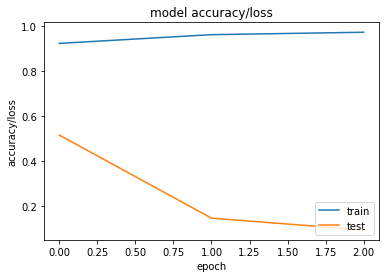

TRAINING DATA
Shape of input sequences: (45872, 180)
Shape of output sequences: (45872, 180, 13)
TESTING DATA
Shape of input sequences: (11468, 180)
Shape of output sequences: (11468, 180, 13)
Epoch 1/3
180/180 [==============================] - 7s 40ms/step - loss: 0.5216 - acc: 0.9251
Epoch 2/3
180/180 [==============================] - 7s 40ms/step - loss: 0.1522 - acc: 0.9611
Epoch 3/3
359/359 [==============================] - 3s 8ms/step - loss: 0.0913 - acc: 0.9730
Loss: 0.09127829968929291,
Accuracy: 0.973003625869751


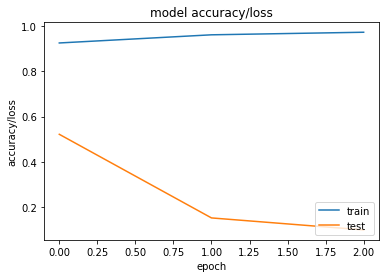

TRAINING DATA
Shape of input sequences: (45872, 180)
Shape of output sequences: (45872, 180, 13)
TESTING DATA
Shape of input sequences: (11468, 180)
Shape of output sequences: (11468, 180, 13)
Epoch 1/3
180/180 [==============================] - 7s 40ms/step - loss: 0.5401 - acc: 0.9271
Epoch 2/3
180/180 [==============================] - 7s 40ms/step - loss: 0.1431 - acc: 0.9629
Epoch 3/3
359/359 [==============================] - 3s 8ms/step - loss: 0.0997 - acc: 0.9702
Loss: 0.09967224299907684,
Accuracy: 0.9702103734016418


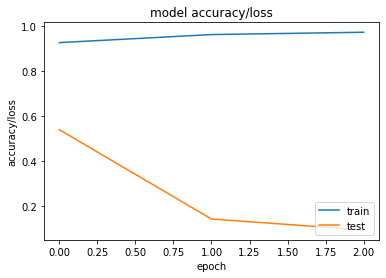

TRAINING DATA
Shape of input sequences: (45872, 180)
Shape of output sequences: (45872, 180, 13)
TESTING DATA
Shape of input sequences: (11468, 180)
Shape of output sequences: (11468, 180, 13)
Epoch 1/3
180/180 [==============================] - 7s 38ms/step - loss: 0.5344 - acc: 0.9155
Epoch 2/3
180/180 [==============================] - 7s 38ms/step - loss: 0.1616 - acc: 0.9580
Epoch 3/3
359/359 [==============================] - 3s 8ms/step - loss: 0.0758 - acc: 0.9783
Loss: 0.07576276361942291,
Accuracy: 0.9782971143722534


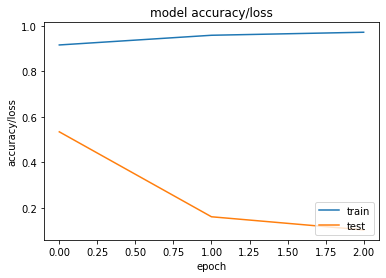

TRAINING DATA
Shape of input sequences: (45872, 180)
Shape of output sequences: (45872, 180, 13)
TESTING DATA
Shape of input sequences: (11468, 180)
Shape of output sequences: (11468, 180, 13)
Epoch 1/3
180/180 [==============================] - 7s 39ms/step - loss: 0.5372 - acc: 0.9162
Epoch 2/3
180/180 [==============================] - 7s 40ms/step - loss: 0.1583 - acc: 0.9589
Epoch 3/3
359/359 [==============================] - 3s 8ms/step - loss: 0.0701 - acc: 0.9802
Loss: 0.07008439302444458,
Accuracy: 0.9802014231681824


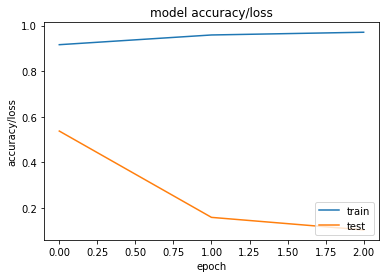

In [ ]:
# training procedure with 5 fold cross validation
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
kf = KFold(n_splits=5)
kf.get_n_splits(X)
kfold_loss = []
kfold_accuracy = []
s = (13,13)
matrix_train = []
matrix_test = []
for train_index, test_index in kf.split(X):
  X_train_fold, Y_train_fold = X[train_index], Y[train_index]
  X_test_fold, Y_test_fold = X[test_index], Y[test_index]
  print("TRAINING DATA")
  print('Shape of input sequences: {}'.format(X_train_fold.shape))
  print('Shape of output sequences: {}'.format(Y_train_fold.shape))
  print("TESTING DATA")
  print('Shape of input sequences: {}'.format(X_test_fold.shape))
  print('Shape of output sequences: {}'.format(Y_test_fold.shape))


  bidirect_model = Sequential()
  bidirect_model.add(Embedding(input_dim     = VOCABULARY_SIZE,
                             output_dim    = EMBEDDING_SIZE,
                             input_length  = MAX_SEQ_LENGTH,
                             weights       = [embedding_weights],
                             trainable     = False
  ))
  bidirect_model.add(Bidirectional(LSTM(32, return_sequences=True)))
  bidirect_model.add(TimeDistributed(Dense(13, activation='softmax')))
  bidirect_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
  bidirect_training = bidirect_model.fit(X_train_fold, Y_train_fold, batch_size=256, epochs=3)

  train_prediction = bidirect_model.predict(X_train_fold)
  test_prediction = bidirect_model.predict(X_test_fold)

  train_prediction = train_prediction.argmax(axis=-1)
  test_prediction = test_prediction.argmax(axis=-1)
  train_true = Y_train_fold.argmax(axis=-1)
  test_true = Y_test_fold.argmax(axis=-1)

  train_prediction_new = np.reshape(train_prediction,45872*180)
  train_true_new = np.reshape(train_true,45872*180)
  test_prediction_new = np.reshape(test_prediction,11468*180)
  test_true_new = np.reshape(test_true,11468*180)
  matrix_train.append(confusion_matrix(train_true_new,train_prediction_new))
  matrix_test.append(confusion_matrix(test_true_new,test_prediction_new))

  loss, accuracy = bidirect_model.evaluate(X_test_fold, Y_test_fold, verbose = 1)
  kfold_loss.append(loss)
  kfold_accuracy.append(accuracy)
  print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))
  # visualise training history
  
  plt.plot(bidirect_training.history['acc'])
  plt.plot(bidirect_training.history['loss'])
  plt.title('model accuracy/loss')
  plt.ylabel('accuracy/loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()


In [ ]:
from pandas import DataFrame
import pandas as pd

In [ ]:
confusion_matrix_train = np.array(matrix_train)

In [ ]:
confusion_matrix_test = np.array(matrix_test)

In [ ]:
val2tag = {
            1 : 'NOUN',
            2 : 'VERB',
            3 : '.',
            4 : 'ADP',
            5 : 'DET',
            6 : 'ADJ',
            7 : 'ADV',
            8 : 'PRON',
            9 : 'CONJ',
            10 : 'PRT',
            11 : 'NUM',
            12 : 'X'
    
    }

In [ ]:
rel_freq_tag = {
    'NUM': 0.013,
    '.': 0.127,
    'VERB': 0.157,
    'ADP': 0.124,
    'ADV': 0.048,
    'PRT': 0.026,
    'DET': 0.118,
    'X': 0.001,
    'PRON': 0.042,
    'ADJ': 0.072,
    'NOUN': 0.24,
    'CONJ': 0.033
}

def analyze_confusion(confusion_matrix, data='test'):
    
    # accuracy computation
    total_examples = np.sum(confusion_matrix)
    correct_predictions = np.trace(confusion_matrix)
    print('The overall accuracy of the Bi-LSTM model is:', correct_predictions * 100 / total_examples)
    
    # storing the confusion matrix in the form of csv file
    tag_list = [val2tag[i] for i in range(1,13)]
    confusion_df = pd.DataFrame(confusion_matrix, index=tag_list, columns=tag_list)
    confusion_df.to_csv('bilstm_confusion_matrix_' + data + '.csv')
    
    # plotting the heat map
    plt.figure(figsize = (20, 20))
    confusion_figure = sns.heatmap(confusion_matrix, annot=True, xticklabels=tag_list, yticklabels=tag_list)
    plt.savefig('bilstm_confusion_figure_' + data + '.png')
    
    # per POS tag statistics
    per_pos_dict = {'tag': [], 'precision': [], 'recall': [], 'f1-score': []}
    for tag_id in range(len(tag_list)):
        per_pos_dict['precision'].append(confusion_matrix[tag_id, tag_id] / np.sum(confusion_matrix[tag_id, :]))
        per_pos_dict['recall'].append(confusion_matrix[tag_id, tag_id] / np.sum(confusion_matrix[:, tag_id]))
        per_pos_dict['tag'].append(tag_list[tag_id])
        per_pos_dict['f1-score'].append(2 * per_pos_dict['precision'][tag_id] * per_pos_dict['recall'][tag_id] / (per_pos_dict['recall'][tag_id] + per_pos_dict['precision'][tag_id]))
    per_pos_df = pd.DataFrame(per_pos_dict)
    print(per_pos_df)
    per_pos_df.to_csv('bilstm_per_pos_accuracy_' + data + '.csv')
    
    # tag_histogram
    tag_histogram = [rel_freq_tag[tag] for tag in tag_list]

    # scatter plot for frequency vs f1-score for every tag
    tag_f1_score = np.nan_to_num(per_pos_dict['f1-score'])
    plt.figure()
    plt.scatter(tag_histogram, tag_f1_score)
    plt.title('Relative Frequency vs f1-score scatter plot')
    plt.xlabel('Relative Frequency of tag')
    plt.ylabel('F1 score')
    plt.savefig('Bi-LSTM_scatter_plot_' + data + '.png')

In [ ]:
cmtest = np.zeros((13,13))
for p in range(5):
  for q in range(13):
    for r in range(13):
      cmtest[q][r] = matrix_test[p][q][r]
#print(cmtest)
cmtrain = np.zeros((13,13))
for s in range(5):
  for t in range(13):
    for u in range(13):
      cmtrain[t][u] = matrix_train[s][t][u]
#print(cmtrain)

[[1.882694e+06 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00]
 [5.640000e+02 2.875100e+04 1.072000e+03 2.335000e+03 1.820000e+02
  1.120000e+02 6.380000e+02 1.710000e+02 2.050000e+02 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00]
 [1.600000e+01 1.515000e+03 2.950500e+04 1.110000e+02 6.700000e+01
  9.000000e+00 5.440000e+02 5.070000e+02 1.000000e+00 0.000000e+00
  1.600000e+01 0.000000e+00 0.000000e+00]
 [2.695000e+03 8.300000e+01 0.000000e+00 2.591300e+04 3.870000e+02
  5.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00]
 [1.470000e+02 4.500000e+01 1.500000e+01 4.042000e+03 1.275200e+04
  8.000000e+01 4.300000e+01 1.266000e+03 0.000000e+00 0.000000e+00
  4.400000e+01 0.000000e+00 0.000000e+00]
 [2.630000e+02 6.500000e+01 0.000000e+00 2.823000e+03 8.170000e+02
  1.573200e+04 4.300000e+01 5.400000e+01 2.330000e+02

In [ ]:
# removing the pad label row and column
cmtrain_new = np.zeros((12,12))
for aa in range(1,13):
  for bb in range(1,13):
    cmtrain_new[aa-1][bb-1] = cmtrain[aa][bb]
#print(cmtrain_new.shape)
cmtest_new = np.zeros((12,12))
for aa in range(1,13):
  for bb in range(1,13):
    cmtest_new[aa-1][bb-1] = cmtest[aa][bb]
#print(cmtest_new)

(12, 12)
[[2.8751e+04 1.0720e+03 2.3350e+03 1.8200e+02 1.1200e+02 6.3800e+02
  1.7100e+02 2.0500e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.5150e+03 2.9505e+04 1.1100e+02 6.7000e+01 9.0000e+00 5.4400e+02
  5.0700e+02 1.0000e+00 0.0000e+00 1.6000e+01 0.0000e+00 0.0000e+00]
 [8.3000e+01 0.0000e+00 2.5913e+04 3.8700e+02 5.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.5000e+01 1.5000e+01 4.0420e+03 1.2752e+04 8.0000e+01 4.3000e+01
  1.2660e+03 0.0000e+00 0.0000e+00 4.4000e+01 0.0000e+00 0.0000e+00]
 [6.5000e+01 0.0000e+00 2.8230e+03 8.1700e+02 1.5732e+04 4.3000e+01
  5.4000e+01 2.3300e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0970e+03 3.4600e+02 3.4200e+02 1.7900e+02 1.0900e+02 6.9940e+03
  7.5300e+02 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [4.2500e+02 3.4400e+02 5.9000e+01 1.2540e+03 1.2900e+02 5.0000e+02
  7.5280e+03 4.5000e+01 0.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00]
 [8.5000e+01 0.0000e+00 1.8000e+

The overall accuracy of the Bi-LSTM model is: 79.38434625585464


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


     tag  precision    recall  f1-score
0   NOUN   0.872538  0.859111  0.865772
1   VERB   0.925502  0.914175  0.919804
2      .   0.612080  0.981999  0.754118
3    ADP   0.691465  0.697326  0.694383
4    DET   0.916463  0.795872  0.851921
5    ADJ   0.747382  0.712002  0.729263
6    ADV   0.686423  0.731869  0.708418
7   PRON   0.959272  0.933033  0.945971
8   CONJ   1.000000  0.027419  0.053375
9    PRT   0.855478  0.058729  0.109913
10   NUM   1.000000  0.112994  0.203046
11     X        NaN  0.000000       NaN


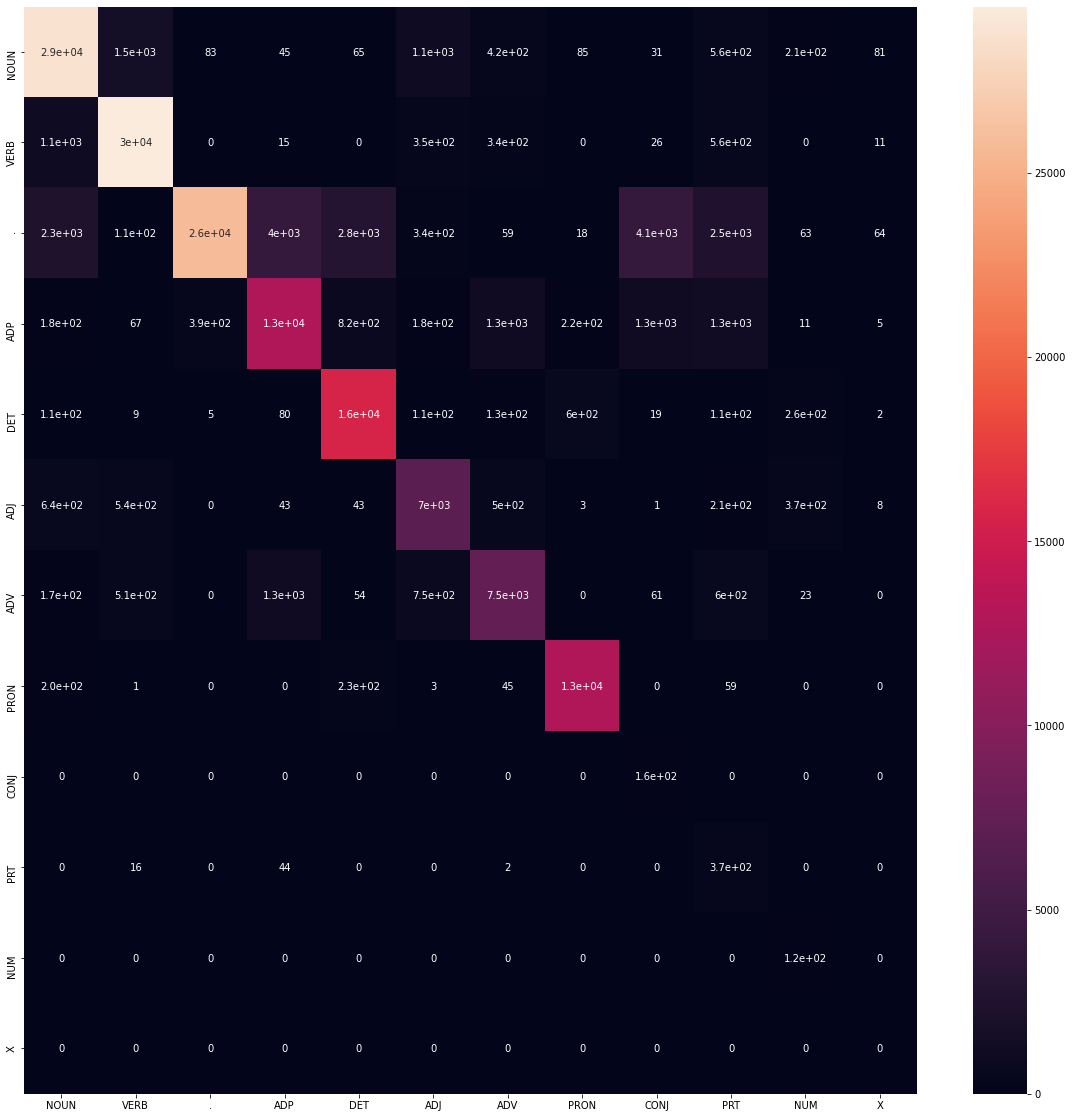

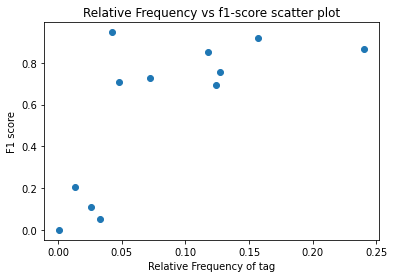

In [ ]:
analyze_confusion(cmtest_new.T)


The overall accuracy of the Bi-LSTM model is: 78.89000332259958


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


     tag  precision    recall  f1-score
0   NOUN   0.882725  0.878853  0.880785
1   VERB   0.925403  0.910133  0.917705
2      .   0.523590  0.956960  0.676849
3    ADP   0.723564  0.719139  0.721344
4    DET   0.942705  0.825064  0.879970
5    ADJ   0.798719  0.719919  0.757275
6    ADV   0.747610  0.736175  0.741848
7   PRON   0.961979  0.921789  0.941455
8   CONJ   0.975588  0.034866  0.067326
9    PRT   0.852479  0.030866  0.059574
10   NUM   0.997386  0.057021  0.107875
11     X        NaN  0.000000       NaN


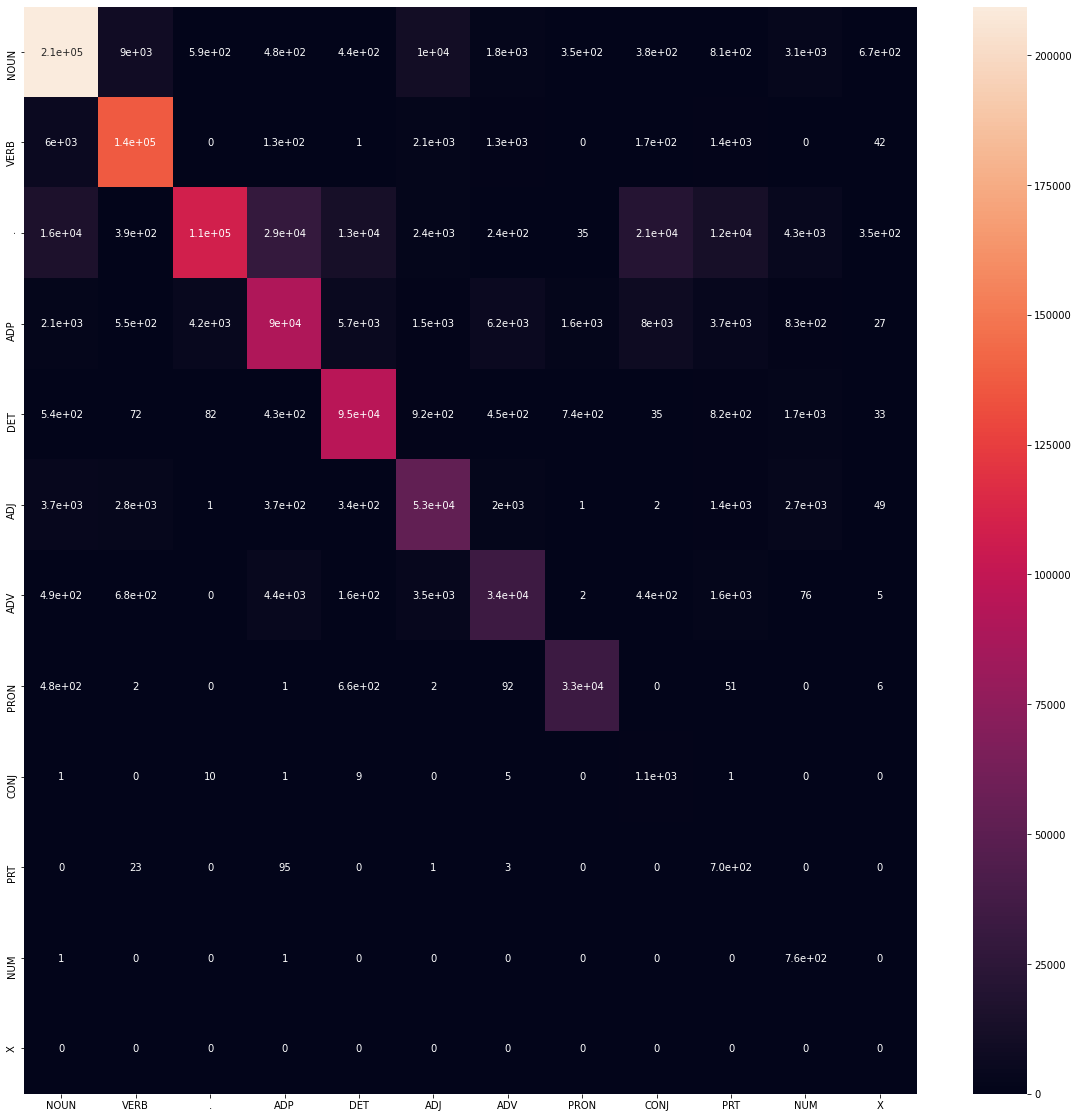

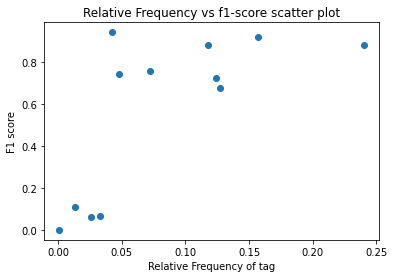

In [ ]:
analyze_confusion(cmtrain_new.T)


In [ ]:
bidirect_model = Sequential()
bidirect_model.add(Embedding(input_dim     = VOCABULARY_SIZE,
                             output_dim    = EMBEDDING_SIZE,
                             input_length  = MAX_SEQ_LENGTH,
                             weights       = [embedding_weights],
                             trainable     = False
  ))
bidirect_model.add(Bidirectional(LSTM(32, return_sequences=True)))
bidirect_model.add(TimeDistributed(Dense(13, activation='softmax')))

In [ ]:
bidirect_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 180, 300)          14944800  
_________________________________________________________________
bidirectional (Bidirectional (None, 180, 64)           85248     
_________________________________________________________________
time_distributed (TimeDistri (None, 180, 13)           845       
Total params: 15,030,893
Trainable params: 86,093
Non-trainable params: 14,944,800
_________________________________________________________________
